In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
gdp_df = pd.read_csv('../data/gdp_per_capita.csv')

In [3]:
gdp_df[:10]

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2021,1517.016266,NaN
1,Afghanistan,2020,1968.341002,NaN
2,Afghanistan,2019,2079.921861,NaN
3,Afghanistan,2018,2060.698973,NaN
4,Afghanistan,2017,2096.093111,NaN
5,Afghanistan,2016,2101.422187,NaN
6,Afghanistan,2015,2108.714173,NaN
7,Afghanistan,2014,2144.449634,NaN
8,Afghanistan,2013,2165.340915,NaN
9,Afghanistan,2012,2122.830759,NaN


In [4]:
gdp_df[-10:]

,Country or Area,Year,Value,Value Footnotes
7652,Zimbabwe,1999,2866.032886,NaN
7653,Zimbabwe,1998,2931.725144,NaN
7654,Zimbabwe,1997,2896.147308,NaN
7655,Zimbabwe,1996,2867.026043,NaN
7656,Zimbabwe,1995,2641.378271,NaN
7657,Zimbabwe,1994,2670.106615,NaN
7658,Zimbabwe,1993,2458.783255,NaN
7659,Zimbabwe,1992,2468.278257,NaN
7660,Zimbabwe,1991,2781.787843,NaN
7661,Zimbabwe,1990,2704.757299,NaN


In [5]:
gdp_df.drop('Value Footnotes', axis=1, inplace=True)
gdp_df.head()

,Country or Area,Year,Value
0,Afghanistan,2021,1517.016266
1,Afghanistan,2020,1968.341002
2,Afghanistan,2019,2079.921861
3,Afghanistan,2018,2060.698973
4,Afghanistan,2017,2096.093111


In [6]:
gdp_df.rename(columns={'Country or Area': 'Country', 'Value': 'GDP_Per_Capita'}, inplace=True)
gdp_df.head()

,Country,Year,GDP_Per_Capita
0,Afghanistan,2021,1517.016266
1,Afghanistan,2020,1968.341002
2,Afghanistan,2019,2079.921861
3,Afghanistan,2018,2060.698973
4,Afghanistan,2017,2096.093111


In [7]:
gdp_df.shape

(7662, 3)

In [8]:
print(gdp_df.dtypes)

Country            object
Year                int64
GDP_Per_Capita    float64
dtype: object


In [9]:
#Going to assume the object type (vs str) is okay for now

In [10]:
gdp_df['Year'].describe()

count    7662.000000
mean     2006.388280
std         9.418727
min      1990.000000
25%      1998.000000
50%      2007.000000
75%      2015.000000
max      2022.000000
Name: Year, dtype: float64

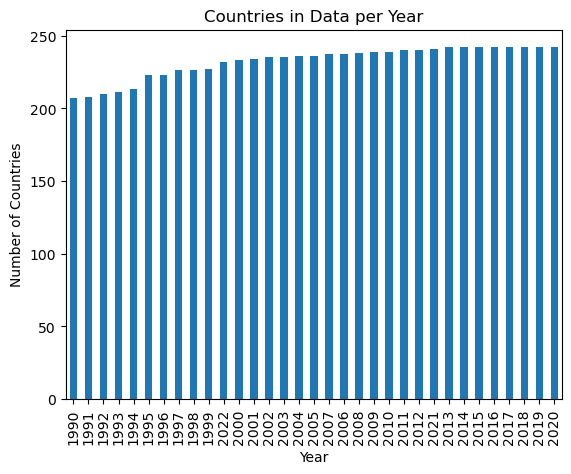

In [11]:
gdp_df['Year'].value_counts()
#I notice that the count generally increases with time... maybe we could plot this. 
#I wonder if this is correlated with the number of countries in the world
year_value_counts = gdp_df['Year'].value_counts(ascending=True)
year_value_counts.plot(kind='bar')
plt.ylabel('Number of Countries')
plt.title('Countries in Data per Year')
plt.show()

In [12]:
print(gdp_df['Country'].unique())
#May need to come back and clean this up...

['Afghanistan' 'Africa Eastern and Southern' 'Africa Western and Central'
 'Albania' 'Algeria' 'Angola' 'Antigua and Barbuda' 'Arab World'
 'Argentina' 'Armenia' 'Aruba' 'Australia' 'Austria' 'Azerbaijan'
 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus' 'Belgium' 'Belize' 'Benin'
 'Bermuda' 'Bhutan' 'Bolivia' 'Bosnia and Herzegovina' 'Botswana' 'Brazil'
 'Brunei' 'Bulgaria' 'Burkina Faso' 'Burundi' "CÃ´te d'Ivoire"
 'Cabo Verde' 'Cambodia' 'Cameroon' 'Canada' 'Caribbean small states'
 'Cayman Islands' 'Central African Republic'
 'Central Europe and the Baltics' 'Chad' 'Chile' 'China' 'Colombia'
 'Comoros' 'Congo' 'Costa Rica' 'Croatia' 'CuraÃ§ao' 'Cyprus' 'Czechia'
 'Dem. Rep. Congo' 'Denmark' 'Djibouti' 'Dominica' 'Dominican Republic'
 'Early-demographic dividend' 'East Asia & Pacific'
 'East Asia & Pacific (excluding high income)'
 'East Asia & Pacific (IDA & IBRD)' 'Ecuador' 'Egypt' 'El Salvador'
 'Equatorial Guinea' 'Estonia' 'Eswatini' 'Ethiopia' 'Euro area'
 'Europe & Central Asia' '

In [13]:
gdp_2021 = gdp_df[gdp_df['Year']==2021]
gdp_2021.describe()

,Year,GDP_Per_Capita
count,241.0,241.000000
mean,2021.0,20711.570080
std,0.0,20916.978968
min,2021.0,714.066712
25%,2021.0,5044.196028
50%,2021.0,13754.802423
75%,2021.0,30974.370692
max,2021.0,115683.493708


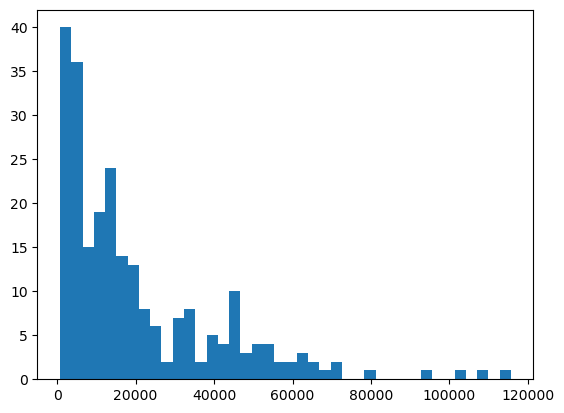

In [14]:
plt.hist(gdp_2021['GDP_Per_Capita'], bins=40)
plt.show()
#I would descibe this as a very right-skewed distribution! 
#The majority of countries have a GDP per cap < 20,000

In [15]:
print(gdp_2021.sort_values('GDP_Per_Capita'))

                       Country  Year  GDP_Per_Capita
972                    Burundi  2021      714.066712
1216  Central African Republic  2021      837.504686
1629           Dem. Rep. Congo  2021     1073.643271
6272                   Somalia  2021     1136.735989
5073                     Niger  2021     1186.576809
...                        ...   ...             ...
680                    Bermuda  2021    78570.489515
5745                     Qatar  2021    92862.571798
3278                   Ireland  2021   102785.490239
6107                 Singapore  2021   107741.118436
4147                Luxembourg  2021   115683.493708

[241 rows x 3 columns]


In [16]:
#Now back to the full gdp_df
gdp_df_filtered = gdp_df[gdp_df['Year'].isin([1990,2021])]
print(gdp_df)
print(gdp_df_filtered)
gdp_pivoted = gdp_df_filtered.pivot_table(index='Country', columns='Year', values='GDP_Per_Capita')
gdp_pivoted.dropna(inplace=True)
print(gdp_pivoted)

          Country  Year  GDP_Per_Capita
0     Afghanistan  2021     1517.016266
1     Afghanistan  2020     1968.341002
2     Afghanistan  2019     2079.921861
3     Afghanistan  2018     2060.698973
4     Afghanistan  2017     2096.093111
...           ...   ...             ...
7657     Zimbabwe  1994     2670.106615
7658     Zimbabwe  1993     2458.783255
7659     Zimbabwe  1992     2468.278257
7660     Zimbabwe  1991     2781.787843
7661     Zimbabwe  1990     2704.757299

[7662 rows x 3 columns]
                          Country  Year  GDP_Per_Capita
0                     Afghanistan  2021     1517.016266
21    Africa Eastern and Southern  2021     3519.174840
52    Africa Eastern and Southern  1990     3037.297466
54     Africa Western and Central  2021     4014.607965
85     Africa Western and Central  1990     2788.301039
...                           ...   ...             ...
7595                        World  1990     9705.981267
7597                       Zambia  2021     323

In [17]:
gdp_pivoted['Percent_Change'] = (100 * (gdp_pivoted[2021]-gdp_pivoted[1990])/(gdp_pivoted[1990]))
print(gdp_pivoted)

Year                                1990          2021  Percent_Change
Country                                                               
Africa Eastern and Southern  3037.297466   3519.174840       15.865334
Africa Western and Central   2788.301039   4014.607965       43.980435
Albania                      4827.027705  14595.944386      202.379544
Algeria                      8828.874473  11029.138782       24.921232
Angola                       5793.084512   5911.835657        2.049878
...                                  ...           ...             ...
Vanuatu                      2774.138350   2800.493866        0.950043
Viet Nam                     2099.394649  10628.219166      406.251608
World                        9705.981267  17055.357429       75.720074
Zambia                       2290.039226   3236.788981       41.342076
Zimbabwe                     2704.757299   2115.144555      -21.799100

[206 rows x 3 columns]


In [18]:
#How many countries experienced a negative percent change from 1990 to 2021?
gdp_pivoted_neg_change = gdp_pivoted[gdp_pivoted['Percent_Change']<0]
print(gdp_pivoted_neg_change)
gdp_pivoted_neg_change['Percent_Change'].describe()
#19 countries experienced a negative percent change

Year                                               1990          2021  \
Country                                                                 
Barbados                                   14097.395550  13754.802423   
Brunei                                     70358.724094  60127.023689   
Burundi                                     1175.155086    714.066712   
Central African Republic                    1200.613390    837.504686   
Congo                                       5007.319245   3234.392972   
Dem. Rep. Congo                             1750.169739   1073.643271   
Fragile and conflict affected situations    4864.814075   4333.881033   
Gabon                                      17559.006114  13814.495200   
Guinea-Bissau                               1998.173206   1831.383229   
Haiti                                       3612.815105   2881.176575   
Kiribati                                    2045.272278   2007.987038   
Kyrgyz Republic                             5158.31

count    19.000000
mean    -17.928420
std      13.029634
min     -39.236385
25%     -26.021350
50%     -18.043873
75%      -6.349968
max      -0.172662
Name: Percent_Change, dtype: float64

In [19]:
gdp_pivoted_pos_change=gdp_pivoted[gdp_pivoted['Percent_Change']>=0]
gdp_pivoted_pos_change = gdp_pivoted_pos_change.sort_values(by='Percent_Change', ascending=False)
print(gdp_pivoted_pos_change.iloc[:2])

Year                      1990          2021  Percent_Change
Country                                                     
Equatorial Guinea   936.419751  14637.007350     1463.081870
China              1423.896348  17657.495181     1140.082904


In [20]:
highest_percent_change_country=gdp_pivoted_pos_change.index[0]
second_highest_percent_change_country=gdp_pivoted_pos_change.index[1]
highest_pct_df = gdp_df[gdp_df['Country']==highest_percent_change_country]
second_highest_pct_df = gdp_df[gdp_df['Country']==second_highest_percent_change_country]
highest_pct_df

,Country,Year,GDP_Per_Capita
2001,Equatorial Guinea,2022,14732.917816
2002,Equatorial Guinea,2021,14637.007350
2003,Equatorial Guinea,2020,15132.379974
2004,Equatorial Guinea,2019,16240.369810
2005,Equatorial Guinea,2018,17764.969630
2006,Equatorial Guinea,2017,19617.844705
2007,Equatorial Guinea,2016,21566.057048
2008,Equatorial Guinea,2015,24563.500604
2009,Equatorial Guinea,2014,28106.198389
2010,Equatorial Guinea,2013,29143.021802


Text(0, 0.5, 'GDP Per Capita')

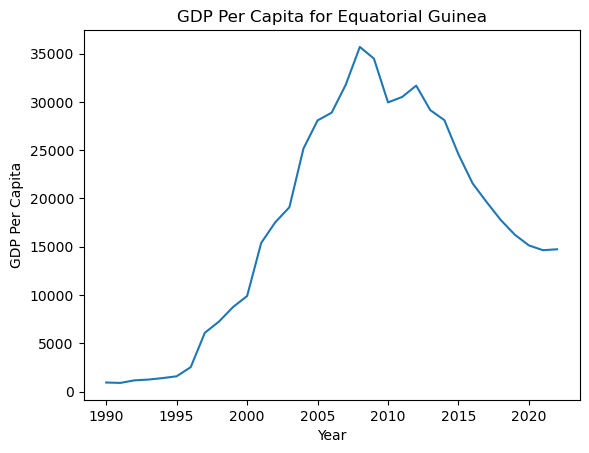

In [21]:
plt.plot(highest_pct_df['Year'], highest_pct_df['GDP_Per_Capita'])
plt.title('GDP Per Capita for ' + highest_percent_change_country)
plt.xlabel('Year')
plt.ylabel('GDP Per Capita') #Is this in USD? How can we find out?

Text(0, 0.5, 'GDP Per Capita')

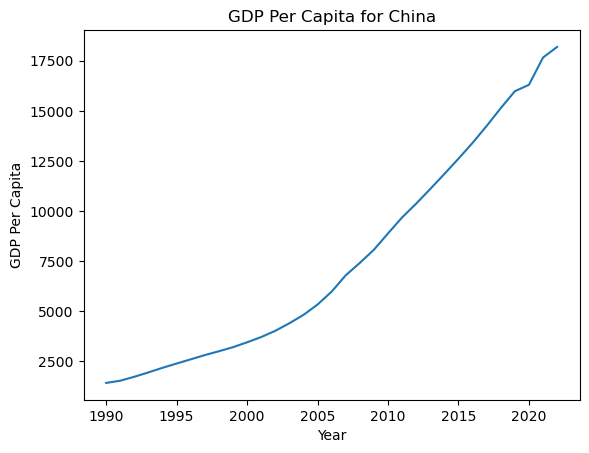

In [22]:
plt.plot(second_highest_pct_df['Year'], second_highest_pct_df['GDP_Per_Capita'])
plt.title('GDP Per Capita for ' + second_highest_percent_change_country)
plt.xlabel('Year')
plt.ylabel('GDP Per Capita')

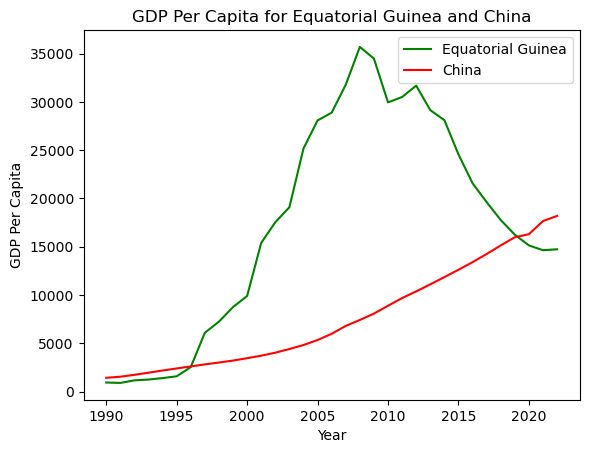

In [23]:
plt.plot(highest_pct_df['Year'], highest_pct_df['GDP_Per_Capita'], color='Green', label=highest_percent_change_country)
plt.plot(second_highest_pct_df['Year'], second_highest_pct_df['GDP_Per_Capita'], color='Red', label=second_highest_percent_change_country)
plt.title('GDP Per Capita for ' + highest_percent_change_country + ' and ' + second_highest_percent_change_country)
plt.xlabel('Year')
plt.ylabel('GDP Per Capita')
plt.legend()
plt.show()

Now we will add the continents folder

In [24]:
continents = pd.read_csv('../data/continents.csv')
continents.head()

,Continent,Country
0,Asia,Afghanistan
1,Europe,Albania
2,Africa,Algeria
3,Europe,Andorra
4,Africa,Angola


In [25]:
gdp_df = pd.merge(gdp_df, continents, on='Country')
print(gdp_df)

          Country  Year  GDP_Per_Capita Continent
0     Afghanistan  2021     1517.016266      Asia
1     Afghanistan  2020     1968.341002      Asia
2     Afghanistan  2019     2079.921861      Asia
3     Afghanistan  2018     2060.698973      Asia
4     Afghanistan  2017     2096.093111      Asia
...           ...   ...             ...       ...
5888     Zimbabwe  1994     2670.106615    Africa
5889     Zimbabwe  1993     2458.783255    Africa
5890     Zimbabwe  1992     2468.278257    Africa
5891     Zimbabwe  1991     2781.787843    Africa
5892     Zimbabwe  1990     2704.757299    Africa

[5893 rows x 4 columns]


Continent
Africa           50
Asia             41
Europe           44
North America    26
Oceania          14
South America    11
Name: Country, dtype: int64


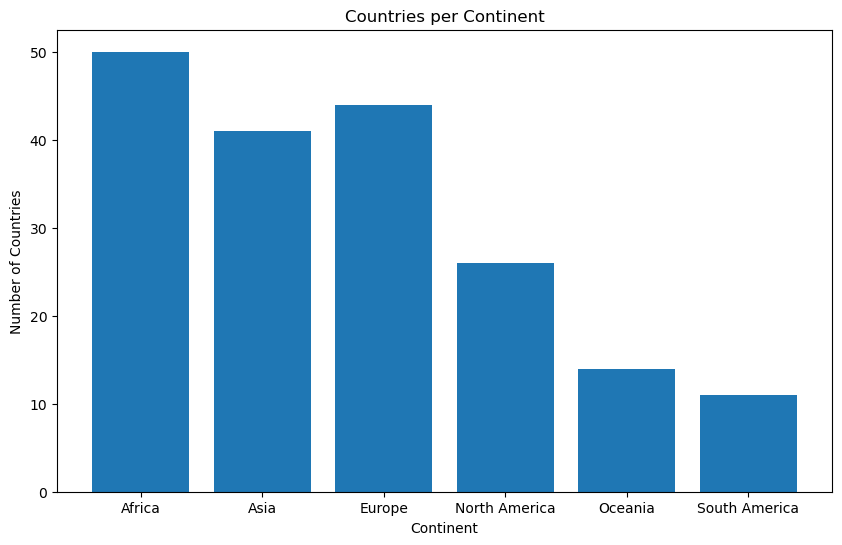

In [26]:
#The following line is not intuitive to me. Is there a better way to think about this?
unique_continent_counts = gdp_df['Country'].groupby(gdp_df['Continent']).nunique()
print(unique_continent_counts)
plt.figure(figsize=(10,6))
plt.bar(unique_continent_counts.index, unique_continent_counts.values)
plt.xlabel('Continent')
plt.ylabel('Number of Countries')
plt.title('Countries per Continent')
plt.show()

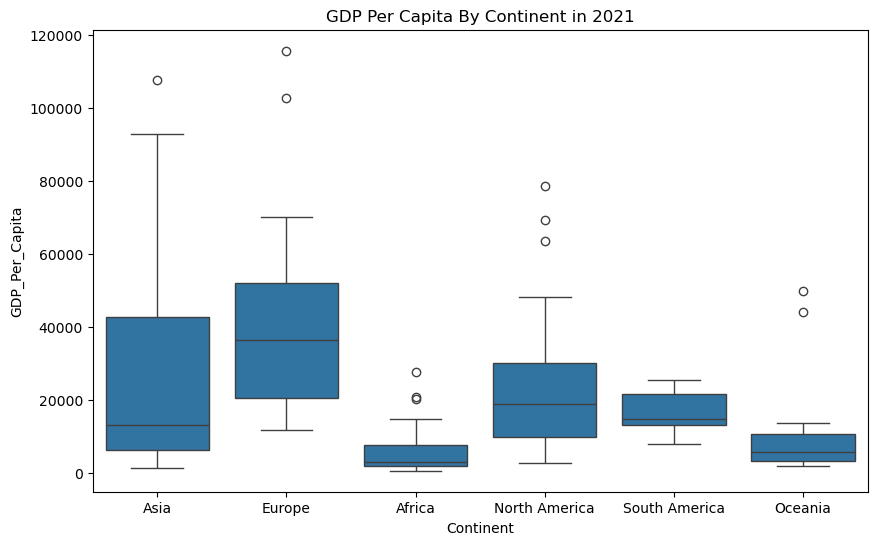

In [27]:
plt.figure(figsize=(10,6))
sns.boxplot(data=gdp_df[gdp_df['Year']==2021], x='Continent', y='GDP_Per_Capita')
plt.title('GDP Per Capita By Continent in 2021')
plt.show()

In [28]:
#Now we read in the life expectancy data
life_expectancy = pd.read_csv('../data/API_SP.DYN.LE00.IN_DS2_en_csv_v2_31632.csv', skiprows=4)
life_expectancy

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,Unnamed: 68
0,Aruba,ABW,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,64.152000,64.537000,64.752000,65.132000,65.294000,65.502000,...,75.683000,75.617000,75.903000,76.072000,76.248000,75.723000,74.626000,74.992000,NaN,NaN
1,Africa Eastern and Southern,AFE,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,44.085552,44.386697,44.752182,44.913159,45.479043,45.498338,...,61.856458,62.444050,62.922390,63.365863,63.755678,63.313860,62.454590,62.899031,NaN,NaN
2,Afghanistan,AFG,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,32.535000,33.068000,33.547000,34.016000,34.494000,34.953000,...,62.659000,63.136000,63.016000,63.081000,63.565000,62.575000,61.982000,62.879000,NaN,NaN
3,Africa Western and Central,AFW,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,37.845152,38.164950,38.735102,39.063715,39.335360,39.618038,...,56.195872,56.581678,56.888446,57.189139,57.555796,57.226373,56.988657,57.626176,NaN,NaN
4,Angola,AGO,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,38.211000,37.267000,37.539000,37.824000,38.131000,38.495000,...,60.655000,61.092000,61.680000,62.144000,62.448000,62.261000,61.643000,61.929000,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,XKX,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,61.485000,61.836000,62.134000,62.440000,62.734000,63.041000,...,78.922000,78.981000,78.783000,78.696000,79.022000,76.567000,76.806000,79.524000,NaN,NaN
262,"Yemen, Rep.",YEM,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,33.678000,34.098000,33.615000,33.247000,34.738000,35.373000,...,65.873000,66.064000,65.957000,64.575000,65.092000,64.650000,63.753000,63.720000,NaN,NaN
263,South Africa,ZAF,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,52.669000,53.085000,53.376000,53.633000,53.906000,54.192000,...,63.950000,64.747000,65.402000,65.674000,66.175000,65.252000,62.341000,61.480000,NaN,NaN
264,Zambia,ZMB,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,49.042000,49.452000,49.794000,50.133000,49.849000,50.563000,...,61.208000,61.794000,62.120000,62.342000,62.793000,62.380000,61.223000,61.803000,NaN,NaN


In [29]:
life_expectancy.drop(columns=['Country Code','Indicator Name','Indicator Code'], inplace=True)

In [30]:
life_expectancy = life_expectancy.melt(id_vars='Country Name')
life_expectancy

,Country Name,variable,value
0,Aruba,1960,64.152000
1,Africa Eastern and Southern,1960,44.085552
2,Afghanistan,1960,32.535000
3,Africa Western and Central,1960,37.845152
4,Angola,1960,38.211000
...,...,...,...
17285,Kosovo,Unnamed: 68,NaN
17286,"Yemen, Rep.",Unnamed: 68,NaN
17287,South Africa,Unnamed: 68,NaN
17288,Zambia,Unnamed: 68,NaN


In [31]:
life_expectancy = life_expectancy.rename(columns={'Country Name':'Country','variable':'Year', 'value':'Life_Expectancy'})

In [32]:
#First country with life expectancy > 80?
life_expectancy.dropna(inplace=True) #Dropping all missing values for Life_Expectancy.
#Did this drop other stuff too?
print(life_expectancy[life_expectancy['Life_Expectancy']>80])
#Japan was the first country to exceed a life expectancy of 80 in 1996!

                     Country  Year  Life_Expectancy
9695                   Japan  1996        80.219756
9926               Gibraltar  1997        80.343000
9938    Hong Kong SAR, China  1997        80.112195
9961                   Japan  1997        80.424146
9988        Macao SAR, China  1997        80.162000
...                      ...   ...              ...
16692                  Qatar  2022        81.559000
16700              Singapore  2022        82.895122
16714               Slovenia  2022        81.282927
16715                 Sweden  2022        83.109756
16748  Virgin Islands (U.S.)  2022        80.319512

[690 rows x 3 columns]


In [33]:
#print(life_expectancy.dtypes)
life_expectancy['Year'] = life_expectancy['Year'].astype(int) #convert year object to int
#print(life_expectancy.dtypes)
gdp_le = pd.merge(gdp_df, life_expectancy, on=['Country', 'Year'])
gdp_le.sort_values(['Country','Year'], inplace=True)
gdp_le

,Country,Year,GDP_Per_Capita,Continent,Life_Expectancy
19,Afghanistan,2002,1280.463171,Asia,56.454
18,Afghanistan,2003,1292.333437,Asia,57.344
17,Afghanistan,2004,1260.060581,Asia,57.944
16,Afghanistan,2005,1352.320627,Asia,58.361
15,Afghanistan,2006,1366.993146,Asia,58.684
...,...,...,...,...,...
5475,Zimbabwe,2018,2399.621551,Africa,61.414
5474,Zimbabwe,2019,2203.396810,Africa,61.292
5473,Zimbabwe,2020,1990.319419,Africa,61.124
5472,Zimbabwe,2021,2115.144555,Africa,59.253


In [34]:
#Just looking at 2021
gdp_le_2021=gdp_le[gdp_le['Year']==2021]
gdp_le_2021_grth80 = gdp_le_2021[gdp_le_2021['Life_Expectancy']>80]
gdp_le_2021_grth80.describe()
#31 countries have a life exp greater than 80 in 2021

,Year,GDP_Per_Capita,Life_Expectancy
count,31.0,31.000000,31.000000
mean,2021.0,54979.098284,82.304566
std,0.0,20645.577965,1.350073
min,2021.0,29548.038910,80.082927
25%,2021.0,42232.509225,81.343902
50%,2021.0,49774.340702,82.324390
75%,2021.0,59000.049986,83.128049
max,2021.0,115683.493708,85.532683


In [41]:
gdp_le_2021=gdp_le_2021.sort_values('GDP_Per_Capita', ascending=False)
print(gdp_le_2021[:20])
fir_highest_GDP_2021=gdp_le_2021['Country'].iloc[0]
sec_highest_GDP_2021=gdp_le_2021['Country'].iloc[1]
thd_highest_GDP_2021=gdp_le_2021['Country'].iloc[2]
highest_gdp_2021_countries = [fir_highest_GDP_2021, sec_highest_GDP_2021, thd_highest_GDP_2021]

                   Country  Year  GDP_Per_Capita      Continent  \
2857            Luxembourg  2021   115683.493708         Europe   
4364             Singapore  2021   107741.118436           Asia   
2285               Ireland  2021   102785.490239         Europe   
4082                 Qatar  2021    92862.571798           Asia   
581                Bermuda  2021    78570.489515  North America   
4796           Switzerland  2021    70097.368753         Europe   
5212  United Arab Emirates  2021    69733.793774           Asia   
1001        Cayman Islands  2021    69400.666661  North America   
3717                Norway  2021    65909.003030         Europe   
2890      Macao SAR, China  2021    64796.995137           Asia   
5278         United States  2021    63635.823810  North America   
2093  Hong Kong SAR, China  2021    60037.445877           Asia   
1296               Denmark  2021    57962.654094         Europe   
3519           Netherlands  2021    56617.351792         Europ

In [36]:
g = gdp_le[gdp_le['Country'].isin(highest_gdp_2021_countries)]
#g.sort_values(['Country', 'Year'])
print(g)

        Country  Year  GDP_Per_Capita Continent  Life_Expectancy
2316    Ireland  1990    26781.627609    Europe        74.846073
2315    Ireland  1991    27141.920541    Europe        75.025000
2314    Ireland  1992    27858.632081    Europe        75.415098
2313    Ireland  1993    28466.114894    Europe        75.292195
2312    Ireland  1994    29986.140304    Europe        75.787122
...         ...   ...             ...       ...              ...
4367  Singapore  2018    98280.042373      Asia        83.297561
4366  Singapore  2019    98455.328233      Asia        83.595122
4365  Singapore  2020    94910.101431      Asia        83.543902
4364  Singapore  2021   107741.118436      Asia        83.092683
4363  Singapore  2022   108036.110993      Asia        82.895122

[99 rows x 5 columns]


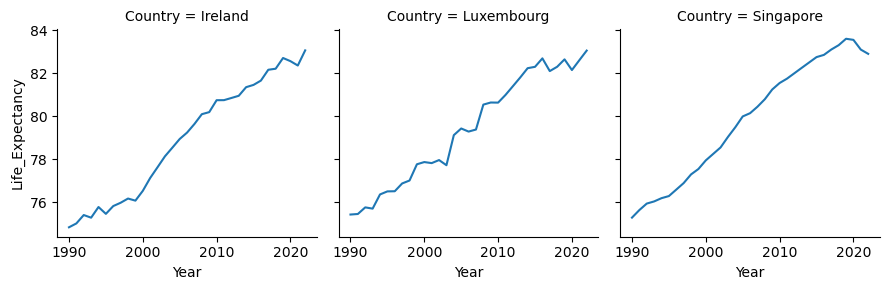

In [37]:
g_graph = sns.FacetGrid(g, col='Country')
g_graph.map(sns.lineplot, "Year", 'Life_Expectancy')

Text(0.5, 1.0, 'Life Expectancy vs. GDP Per Capita in 2021')

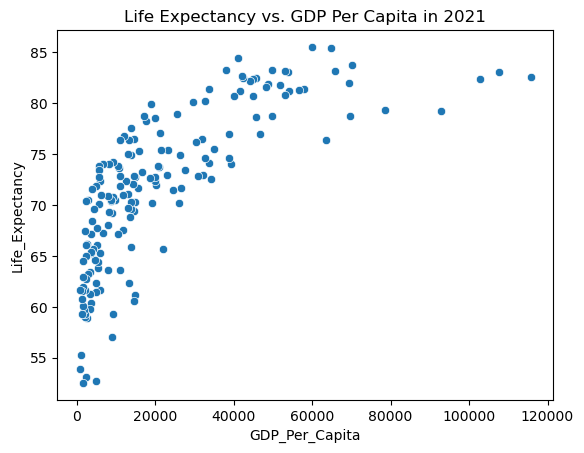

In [38]:
sns.scatterplot(data=gdp_le_2021, x='GDP_Per_Capita', y='Life_Expectancy')
plt.title('Life Expectancy vs. GDP Per Capita in 2021')

In [39]:
corr_le_gdp_2021 = gdp_le_2021['Life_Expectancy'].corr(gdp_le_2021['GDP_Per_Capita'])
print(corr_le_gdp_2021)

0.7450812403297987


                       Country  Year  GDP_Per_Capita      Continent  \
2857                Luxembourg  2021   115683.493708         Europe   
4364                 Singapore  2021   107741.118436           Asia   
2285                   Ireland  2021   102785.490239         Europe   
4082                     Qatar  2021    92862.571798           Asia   
581                    Bermuda  2021    78570.489515  North America   
...                        ...   ...             ...            ...   
3368                Mozambique  2021     1226.766964         Africa   
3618                     Niger  2021     1186.576809         Africa   
4489                   Somalia  2021     1136.735989         Africa   
1004  Central African Republic  2021      837.504686         Africa   
840                    Burundi  2021      714.066712         Africa   

      Life_Expectancy  log_GDP_Per_Capita  
2857        82.597561            5.063271  
4364        83.092683            5.032381  
2285        82.

Text(0.5, 1.0, 'Life Expectancy vs. log GDP Per Capita in 2021')

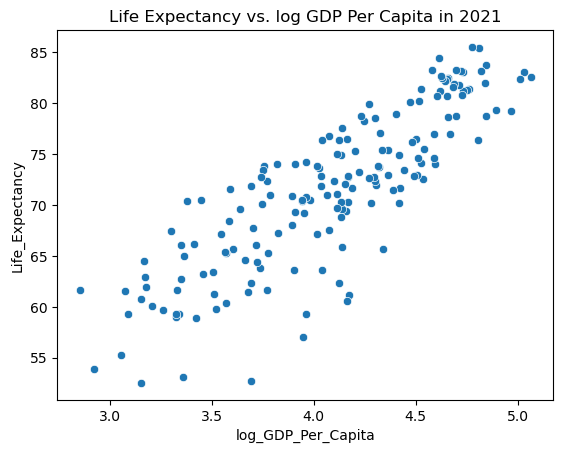

In [40]:
gdp_le_2021['log_GDP_Per_Capita'] = gdp_le_2021['GDP_Per_Capita'].apply(np.log10)
print(gdp_le_2021)
log_corr_le_gdp_2021 = gdp_le_2021['Life_Expectancy'].corr(gdp_le_2021['log_GDP_Per_Capita'])
print(log_corr_le_gdp_2021)
sns.scatterplot(data=gdp_le_2021, x='log_GDP_Per_Capita', y='Life_Expectancy')
plt.title('Life Expectancy vs. log GDP Per Capita in 2021')